In [1]:
%matplotlib inline 
import xarray as xr
import numpy as np
import os 

from datetime import datetime

import dask.distributed as dd
import dask
import rhg_compute_tools.kubernetes as rhgk

/srv/conda/envs/notebook/lib/python3.8/site-packages/dask_gateway/client.py:21: FutureWarning: format_bytes is deprecated and will be removed in a future release. Please use dask.utils.format_bytes instead.
  from distributed.utils import LoopRunner, format_bytes


In [2]:
import gcsfs
fs = gcsfs.GCSFileSystem(token='/opt/gcsfuse_tokens/impactlab-data.json')

In [1]:
'''client, cluster = rhgk.get_standard_cluster()
cluster'''

'client, cluster = rhgk.get_standard_cluster()\ncluster'

In [4]:
variable = 'tasmax'
store_filename = 'gs://impactlab-data/climate/source_data/ERA-5/downscaling/tasmax.1995-2014.F320.v2.zarr'.format(variable)
store = fs.get_mapper(store_filename, check=False)

In [5]:
ds = xr.open_zarr(store, consolidated=False)

In [6]:
ds

<xarray.Dataset>
Dimensions:    (time: 8030, latitude: 640, longitude: 1280)
Coordinates:
    dayofyear  (time) int64 dask.array<chunksize=(8030,), meta=np.ndarray>
  * latitude   (latitude) float32 89.78 89.51 89.23 ... -89.23 -89.51 -89.78
  * longitude  (longitude) float32 0.0 0.2813 0.5625 ... 359.2 359.4 359.7
  * time       (time) object 1994-01-01 00:00:00 ... 2015-12-31 00:00:00
Data variables:
    tasmax     (time, latitude, longitude) float32 dask.array<chunksize=(365, 640, 1280), meta=np.ndarray>
Attributes:
    author:   Meredith Fish
    contact:  meredith.fish@rutgers.edu
    created:  2021-06-08
    method:   Changed calendar to no-leap and removed leap days
    project:  global downscaling [ERA-5]
    source:   impactlab-data/climate/source-data/ERA-5/tasmax/hourly/netcdf/

additional validation of ERA-5 needed based on this notebook: https://nbviewer.jupyter.org/github/cgentemann/cloud_science/blob/master/Cloud_testing/era5_pangeo_1983.ipynb

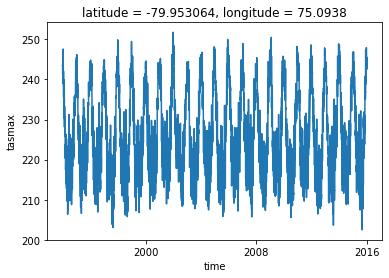

In [7]:
ds.tasmax.sel(longitude=75,latitude=-80,method='nearest').plot()

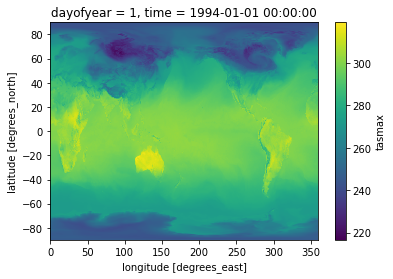

In [8]:
ds.tasmax.isel(time=0).plot()

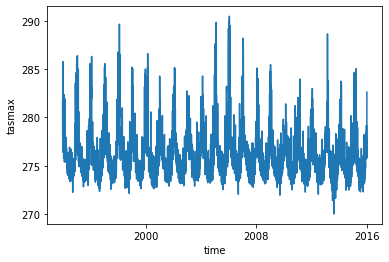

In [18]:
ds.tasmax.isel(latitude=slice(-90, -75)).max(['latitude', 'longitude']).plot()

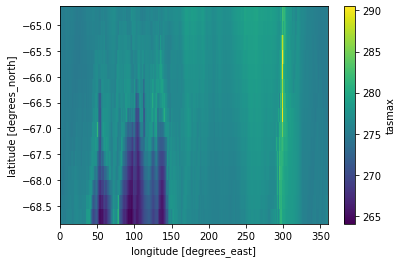

In [16]:
ds.tasmax.isel(latitude=slice(-90, -75)).max('time').plot()

In [ ]:
ds.tasmax.mean('longitude').plot()

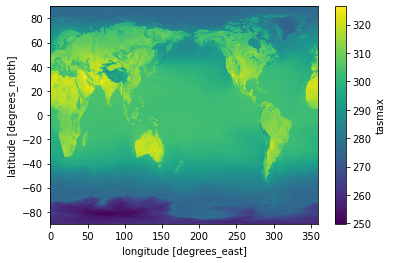

In [16]:
ds.tasmax.max('time').plot()